
<h5>Baturalp Topcu</h5>
<h5>MSBA-2</h5>

<h1>Classification Analysis</h1>

In [74]:
# Student Name : Baturalp Topcu 
# Cohort       : MSBA-2
"""
    This file includes necessary packages,analysis, business insights and machine learning model
    to predict cross sell success of Apprentice Chef Inc. At the end of my analysis, I decided 
    to use GaussianNB model because it gives me the best AUC score which is 0.772.
    
"""

# importing libraries
import random as rand # random number generation
import pandas as pd # data science essentials
import numpy as np # numpy array
import seaborn as sns # enhanced data visualization
import matplotlib.pyplot as plt # essential graphical ou
from sklearn.model_selection import train_test_split # train/test split
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler     # standard scaler
import sklearn.ensemble as e
from sklearn.model_selection import GridSearchCV

file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
chef = pd.read_excel(file)


# checking the file
chef.head(n = 5)


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,4,1,0,90,135.3,3,1,3,13,253


**Dictionary of Apprentice Chef Data**


In [75]:
#dictionary = 'Apprentice_Chef_Data_Dictionary.xlsx'


# reading the file into Python
#dict_chef = pd.read_excel(dictionary)
#dict_chef

**Copying the Data Set and Flagging Missing Value**

I copied the data set as chef_c and checked how many missing value I have in our dataset. According to my result, 47 family name is missing. Therefore, I flagged the column as m_FAMILY_NAME 


In [76]:
# Copy the chef dataset
chef_c = pd.DataFrame.copy(chef)

# Check how many missing value we have in our dataset
chef_c.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

In [77]:
for col in chef_c:

    if chef_c[col].isnull().astype(int).sum() > 0:
         chef_c['m_'+col] = chef_c[col].isnull().astype(int)
            

**Creating New Features**

- I created new features which is the 'NUMBER_OF_NAMES'

In [78]:
# string_split
#########################
def string_split(col, df, sep=' ', new_col_name='NUMBER_OF_NAMES'):
    
    df[new_col_name] = 0  
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep =' '))

# calling text_split_feature
string_split(col='NAME',df=chef_c)


# checking results
chef_c['NUMBER_OF_NAMES']

0       2
1       2
2       5
3       5
4       3
       ..
1941    1
1942    1
1943    2
1944    1
1945    2
Name: NUMBER_OF_NAMES, Length: 1946, dtype: int64

- I categorized emails according to the Apprentice Chef company template of professional,personal and junk

In [79]:
#Splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef_c.iterrows():
    
    # splitting email domain at '@'
    split_email = chef_c.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

# concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating personal_email_domain with friends DataFrame
chef_c = pd.concat([chef_c, email_df['email_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
chef_c.loc[: ,'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
jnj.com              28
mcdonalds.com        28
merck.com            28
nike.com             27
apple.com            27
ge.org               26
ibm.com              26
dupont.com           26
chevron.com          25
microsoft.com        25
exxon.com            24
unitedhealth.com     24
travelers.com        24
boeing.com           23
pg.com               22
caterpillar.com      22
mmm.com              22
verizon.com          22
disney.com           21
walmart.com          21
visa.com             20
pfizer.com           20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
homedepot.com        17
intel.com            17
Name: email_domain, dtype: int64

In [80]:


# email domain types
professional_d = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com','@cisco.com','@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org.com','@goldmansacs.com','@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com','@nike.com','@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']
personal_d  = ['@gmail.com','@yahoo.com','@protonmail.com']
junk_d = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef_c['email_domain']:
    
    if '@' + domain in professional_d:
        placeholder_lst.append('PROFESSIONAL_EMAIL')
        

    elif '@' + domain in personal_d:
        placeholder_lst.append('PERSONAL_EMAIL')

    elif '@' + domain in junk_d:
        placeholder_lst.append('JUNK_EMAIL')
        
    else:
        placeholder_lst.append('UNKNOWN_EMAIL')
        


# concatenating with original DataFrame
chef_c['domain_group'] = pd.Series(placeholder_lst)


# checking results
chef_c['domain_group'].value_counts()




PERSONAL_EMAIL        861
PROFESSIONAL_EMAIL    670
JUNK_EMAIL            389
UNKNOWN_EMAIL          26
Name: domain_group, dtype: int64

- I did one-hot coding for domain group to get more clear data

In [81]:
# one hot encoding variables
one_hot_email       = pd.get_dummies(chef_c['domain_group'])


# joining codings together
chef_c = chef_c.join([one_hot_email])

# checking results
chef_c.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS',
       'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
       'm_FAMILY_NAME', 'NUMBER_OF_NAMES', 'email_domain', 'domain_group',
       'JUNK_EMAIL', 'PERSONAL_EMAIL', 'PROFESSIONAL_EMAIL', 'UNKNOWN_EMAIL'],
      dtype='object')

In [82]:
# saving results
chef_c.to_excel('chef_feature_rich.xlsx',
                 index = False)
# loading saved file
chef_c = pd.read_excel('chef_feature_rich.xlsx')

In [83]:
# dropping categorical variables after they've been encoded
chef_c=chef_c.drop(labels=[ 'NAME', 'EMAIL', 'FIRST_NAME',
               'FAMILY_NAME','email_domain','domain_group'],
                     axis=1)



# checking the results
chef_c.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED',
       'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
       'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',
       'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
       'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN',
       'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
       'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
       'm_FAMILY_NAME', 'NUMBER_OF_NAMES', 'JUNK_EMAIL', 'PERSONAL_EMAIL',
       'PROFESSIONAL_EMAIL', 'UNKNOWN_EMAIL'],
      dtype='object')

After I save the file with new features. I decided to drop 'NAME', 'EMAIL', 'FIRST_NAME',
               'FAMILY_NAME','email_domain','domain_group' columns because these are not necessary and they will effect our result negatively.
               

**Outlier Analysis & Feature Engineering**

I set thresholds according to the outliers in distplots and box plot. 

/Users/baturalptopcu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


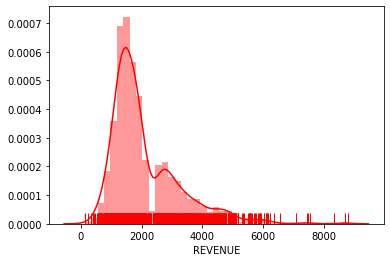

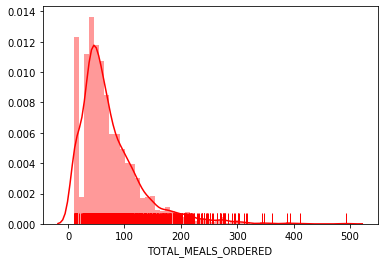

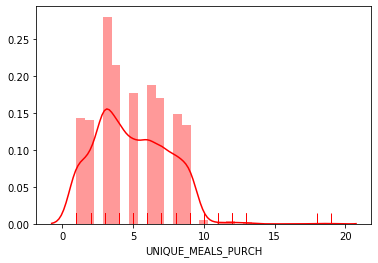

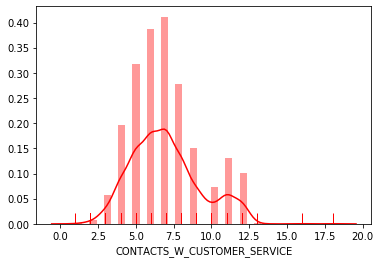

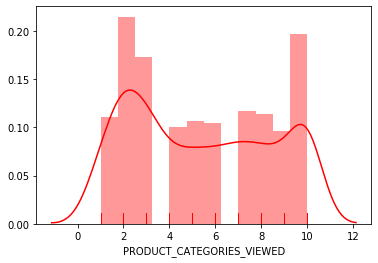

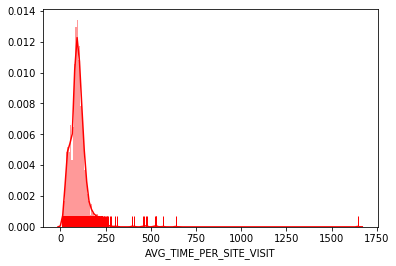

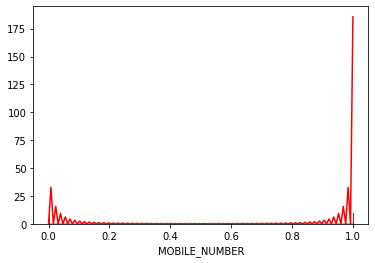

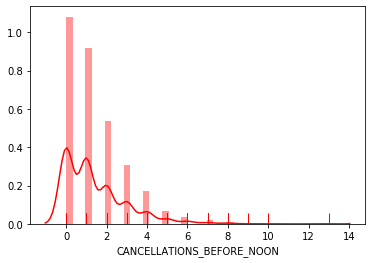

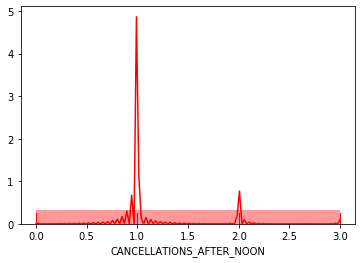

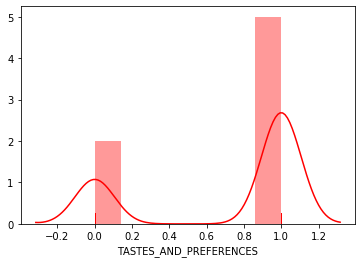

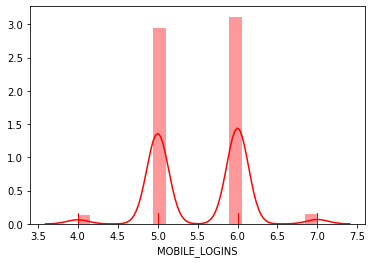

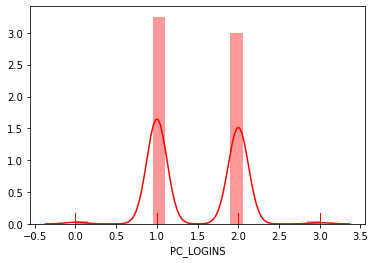

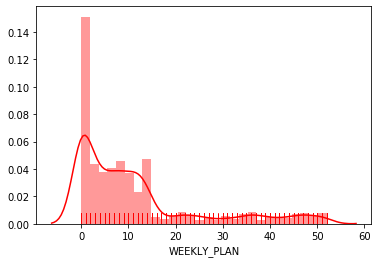

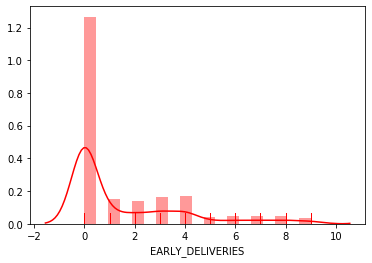

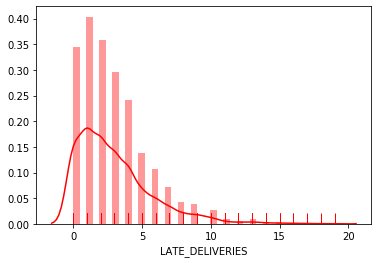

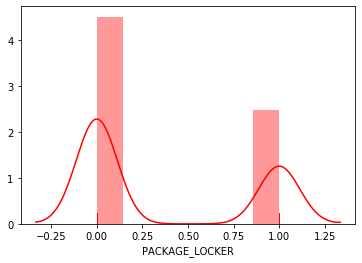

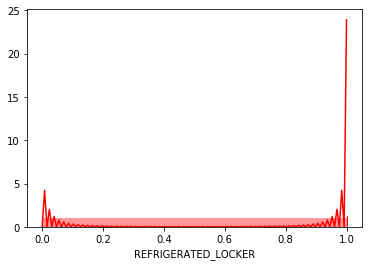

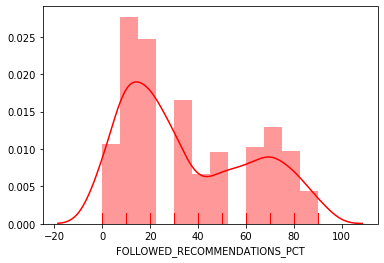

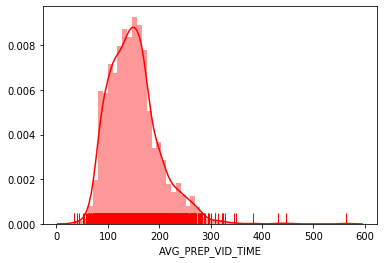

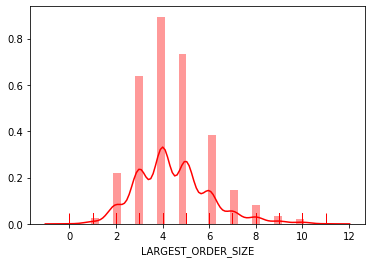

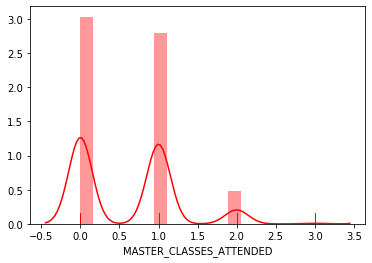

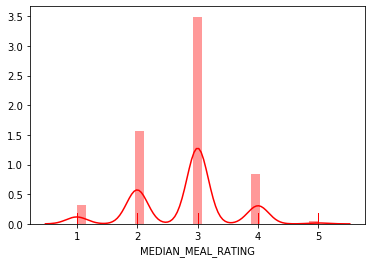

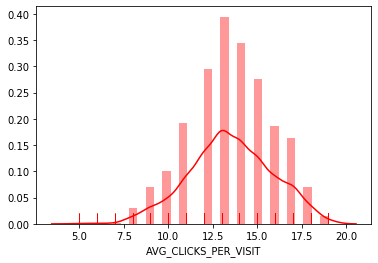

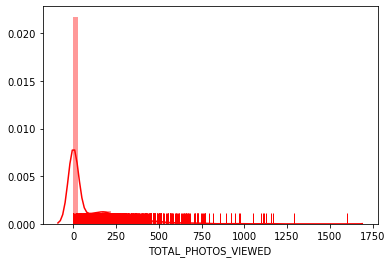

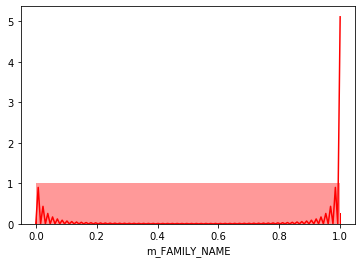

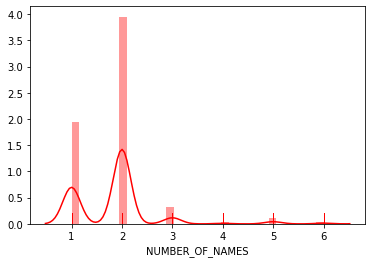

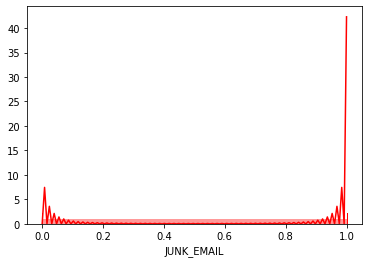

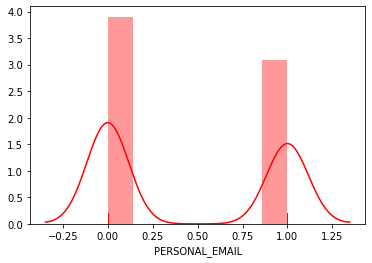

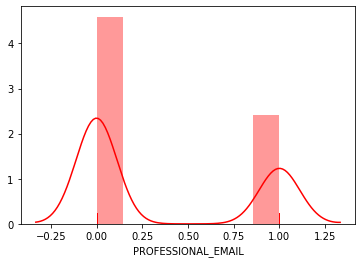

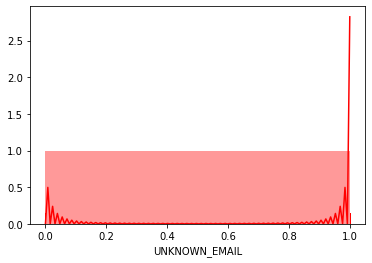

In [84]:
# Outlier Analysis
lst=['REVENUE', 'TOTAL_MEALS_ORDERED',
       'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
       'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',
       'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
       'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN',
       'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
       'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
       'm_FAMILY_NAME', 'NUMBER_OF_NAMES', 'JUNK_EMAIL', 'PERSONAL_EMAIL',
       'PROFESSIONAL_EMAIL', 'UNKNOWN_EMAIL']


#Ploting displots to analyze outliers
for c in lst:
            fig, ax = plt.subplots(figsize = (6, 4))
            sns.distplot(chef_c[c],
                         bins  = 'fd',
                         kde  = True,
                         rug  = True,
                         color = 'r')
            plt.xlabel(c)
            



In [85]:
# Setting outlier thresholds according to trend_based features and displots

total_meal_hi         = 180
unique_meals_hi       = 7
contacts_w_hi         = 10
product_cat_lo        = 1
product_cat_hi        = 10
avg_time_per_site_hi  = 190
cancel_before_hi      = 5
cancel_after_hi       = 1
mobile_log_lo         = 5
mobile_log_hi         = 6
pc_log_hi             = 3
weekly_plan_hi        = 13
early_deli_hi         = 7
late_deli_hi          = 7
followed_pct_lo       = 0
followed_pct_hi       = 90
avg_prep_vid_lo       = 100
avg_prep_vid_hi       = 250
largest_order_lo      = 3
largest_order_hi      = 5
master_class_lo       = 0
master_class_hi       = 2
median_meal_lo        = 1
median_meal_hi        = 4
avg_clicks_lo         = 8
avg_clicks_hi         = 19
total_view_hi         = 400
number_of_names_hi    = 3

revenue_lo            = 130
revenue_hi            = 2400

In [86]:
#BOX PLOT LOOP
#for c in lst:
#            fig, ax = plt.subplots(figsize = (6, 4))
#            sns.boxplot(chef_c[c])
#            plt.xlabel(c)

In [87]:
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# TOTAL MEALS ORDERED
chef_c['out_total_meal'] = 0
condition_hi = chef_c.loc[0:,'out_total_meal'][chef_c['TOTAL_MEALS_ORDERED'] > total_meal_hi]

chef_c['out_total_meal'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# UNIQUE MEALS PURCHASED
chef_c['out_unique_meals'] = 0
condition_hi = chef_c.loc[0:,'out_unique_meals'][chef_c['UNIQUE_MEALS_PURCH'] > unique_meals_hi]

chef_c['out_unique_meals'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# CONTACTS WITH CUSTOMER SERVICE 
chef_c['out_contacts_w'] = 0
condition_hi = chef_c.loc[0:,'out_contacts_w'][chef_c['CONTACTS_W_CUSTOMER_SERVICE'] > contacts_w_hi]

chef_c['out_contacts_w'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



# PRODUCT CATEGORIES VIEWED
chef_c['out_product_cat'] = 0
condition_hi = chef_c.loc[0:,'out_product_cat'][chef_c['PRODUCT_CATEGORIES_VIEWED'] > product_cat_hi]
condition_lo = chef_c.loc[0:,'out_product_cat'][chef_c['PRODUCT_CATEGORIES_VIEWED'] < product_cat_lo]

chef_c['out_product_cat'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef_c['out_product_cat'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVERAGE TIME PER SITE VISIT
chef_c['out_avg_time_per_site'] = 0
condition_hi = chef_c.loc[0:,'out_avg_time_per_site'][chef_c['AVG_TIME_PER_SITE_VISIT'] > avg_time_per_site_hi]

chef_c['out_avg_time_per_site'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

#CANCELLATIONS BEFORE NOON
chef_c['out_cancel_before'] = 0
condition_hi = chef_c.loc[0:,'out_cancel_before'][chef_c['CANCELLATIONS_BEFORE_NOON'] > cancel_before_hi]

chef_c['out_cancel_before'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

#CANCELLATIONS AFTER NOON
chef_c['out_cancel_after'] = 0
condition_hi = chef_c.loc[0:,'out_cancel_after'][chef_c['CANCELLATIONS_AFTER_NOON'] > cancel_after_hi]

chef_c['out_cancel_after'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


#MOBILE LOGINS
chef_c['out_mobile_log'] = 0
condition_hi = chef_c.loc[0:,'out_mobile_log'][chef_c['MOBILE_LOGINS'] > mobile_log_hi]
condition_lo = chef_c.loc[0:,'out_mobile_log'][chef_c['MOBILE_LOGINS'] < mobile_log_lo]

chef_c['out_mobile_log'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef_c['out_mobile_log'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)




#PC LOGINS
chef_c['out_pc_log'] = 0
condition_hi = chef_c.loc[0:,'out_pc_log'][chef_c['PC_LOGINS'] > pc_log_hi]

chef_c['out_pc_log'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

#WEEKLY PLAN  
chef_c['out_weekly_plan'] = 0
condition_hi = chef_c.loc[0:,'out_weekly_plan'][chef_c['WEEKLY_PLAN'] > weekly_plan_hi]

chef_c['out_weekly_plan'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

#EARLY DELIVERIES
chef_c['out_early_deli'] = 0
condition_hi = chef_c.loc[0:,'out_early_deli'][chef_c['EARLY_DELIVERIES'] > early_deli_hi]

chef_c['out_early_deli'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

#LATE DELIVERIES
chef_c['out_late_deli'] = 0
condition_hi = chef_c.loc[0:,'out_late_deli'][chef_c['LATE_DELIVERIES'] > late_deli_hi]

chef_c['out_late_deli'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



#FOLLOWED RECOMMENDATIONS PERCENTAGE
chef_c['out_followed_pct'] = 0
condition_hi = chef_c.loc[0:,'out_followed_pct'][chef_c['FOLLOWED_RECOMMENDATIONS_PCT'] > followed_pct_hi]
condition_lo = chef_c.loc[0:,'out_followed_pct'][chef_c['FOLLOWED_RECOMMENDATIONS_PCT'] < followed_pct_lo]

chef_c['out_followed_pct'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef_c['out_followed_pct'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


#AVGERAGE PREPERATION VIDEO TIME
chef_c['out_avg_prep_vid'] = 0
condition_hi = chef_c.loc[0:,'out_avg_prep_vid'][chef_c['AVG_PREP_VID_TIME'] > avg_prep_vid_hi]
condition_lo = chef_c.loc[0:,'out_avg_prep_vid'][chef_c['AVG_PREP_VID_TIME'] < avg_prep_vid_lo]

chef_c['out_avg_prep_vid'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef_c['out_avg_prep_vid'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#LARGEST ORDER SIZE
chef_c['out_largest_order'] = 0
condition_hi = chef_c.loc[0:,'out_largest_order'][chef_c['LARGEST_ORDER_SIZE'] > largest_order_hi]
condition_lo = chef_c.loc[0:,'out_largest_order'][chef_c['LARGEST_ORDER_SIZE'] < largest_order_lo]

chef_c['out_largest_order'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef_c['out_largest_order'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)




#MASTER CLASSES ATTENDED
chef_c['out_master_class'] = 0
condition_hi = chef_c.loc[0:,'out_master_class'][chef_c['MASTER_CLASSES_ATTENDED'] > master_class_hi]
condition_lo = chef_c.loc[0:,'out_master_class'][chef_c['MASTER_CLASSES_ATTENDED'] < master_class_lo]

chef_c['out_master_class'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef_c['out_master_class'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


#MEDIAN MEAL RATING
chef_c['out_median_meal'] = 0
condition_hi = chef_c.loc[0:,'out_median_meal'][chef_c['MEDIAN_MEAL_RATING'] > median_meal_hi]
condition_lo = chef_c.loc[0:,'out_median_meal'][chef_c['MEDIAN_MEAL_RATING'] < median_meal_lo]

chef_c['out_median_meal'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef_c['out_median_meal'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


#AVG CLICKS PER VISIT
chef_c['out_avg_clicks'] = 0
condition_hi = chef_c.loc[0:,'out_avg_clicks'][chef_c['AVG_CLICKS_PER_VISIT'] > avg_clicks_hi]
condition_lo = chef_c.loc[0:,'out_avg_clicks'][chef_c['AVG_CLICKS_PER_VISIT'] < avg_clicks_lo]

chef_c['out_avg_clicks'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef_c['out_avg_clicks'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


#TOTAL PHOTOS VIEWED
chef_c['out_total_view'] = 0
condition_hi = chef_c.loc[0:,'out_total_view'][chef_c['TOTAL_PHOTOS_VIEWED'] > total_view_hi]

chef_c['out_total_view'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


#NUMBER OF NAMES
chef_c['out_number_of_names'] = 0
condition_hi = chef_c.loc[0:,'out_number_of_names'][chef_c['NUMBER_OF_NAMES'] > number_of_names_hi]

chef_c['out_number_of_names'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

#REVENUE

chef_c['out_revenue'] = 0
condition_hi = chef_c.loc[0:,'out_revenue'][chef_c['REVENUE'] > revenue_hi]
condition_lo = chef_c.loc[0:,'out_revenue'][chef_c['REVENUE'] < revenue_lo]

chef_c['out_revenue'].replace(to_replace = condition_hi,
                                   value      = 1,
                                  inplace    = True)

chef_c['out_revenue'].replace(to_replace = condition_lo,
                                   value      = 1,
                                  inplace    = True)


**Correlation of Cross Sell Success with Other Features**

Since there is no strong correlation. I decided to do Logistic regression to see better which features are more related to each other

In [88]:
df_corr = chef_c.corr()

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False).round(3)

CROSS_SELL_SUCCESS              1.000
FOLLOWED_RECOMMENDATIONS_PCT    0.464
PROFESSIONAL_EMAIL              0.190
CANCELLATIONS_BEFORE_NOON       0.163
NUMBER_OF_NAMES                 0.156
MOBILE_NUMBER                   0.103
TASTES_AND_PREFERENCES          0.081
REFRIGERATED_LOCKER             0.068
out_cancel_before               0.060
MOBILE_LOGINS                   0.044
PACKAGE_LOCKER                  0.044
PERSONAL_EMAIL                  0.039
MASTER_CLASSES_ATTENDED         0.037
CONTACTS_W_CUSTOMER_SERVICE     0.037
AVG_PREP_VID_TIME               0.032
MEDIAN_MEAL_RATING              0.032
out_median_meal                 0.029
out_early_deli                  0.024
UNKNOWN_EMAIL                   0.023
LARGEST_ORDER_SIZE              0.022
out_late_deli                   0.019
EARLY_DELIVERIES                0.015
m_FAMILY_NAME                   0.015
AVG_TIME_PER_SITE_VISIT         0.011
out_total_view                  0.011
TOTAL_PHOTOS_VIEWED             0.010
LATE_DELIVER

In [89]:
# declaring explanatory variables
chef_data=chef_c.drop(labels=['CROSS_SELL_SUCCESS'],axis=1)


# declaring response variable
chef_target=chef_c.loc[:,'CROSS_SELL_SUCCESS']

In [92]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 508,
            stratify = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

In [93]:
#for val in chef_data:
 #   print(f"{val} +")

**Some Features are Taken Out For the Logistic Regression**

I droped out UNKNOWN_EMAIL,PC_LOGINS feature because they were creating confuion. Since I got this output;




<p>out_product_cat                   NaN</p>
<p>out_pc_log                        NaN</p>
<p>out_followed_pct                  NaN</p>



I droped out these 3 features as well to get a true running logistic regression as it seems below.

In [94]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula ="""CROSS_SELL_SUCCESS~REVENUE +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
FOLLOWED_RECOMMENDATIONS_PCT +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
m_FAMILY_NAME +
NUMBER_OF_NAMES +
JUNK_EMAIL +
PERSONAL_EMAIL +
PROFESSIONAL_EMAIL +
out_total_meal +
out_unique_meals +
out_contacts_w +
out_avg_time_per_site +
out_cancel_before +
out_cancel_after +
out_weekly_plan +
out_late_deli +
out_avg_prep_vid +
out_largest_order +
out_master_class +
out_median_meal +
out_avg_clicks +
out_total_view +
out_revenue +
out_number_of_names""",
                       data= chef_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary()

         Current function value: 0.403916
         Iterations: 35


/Users/baturalptopcu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1414
Method:                           MLE   Df Model:                           44
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.3568
Time:                        19:44:11   Log-Likelihood:                -589.31
converged:                      False   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                1.447e-109
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -5.2621      1.702     -3.091      0.002      -8.598      -1.926
REVENUE                         -0.0003      0.000     -1.850      0.064      -0.001    1.56e-05
TOTAL_MEALS_ORDERED             -0.0002      0.003     -0.098      0.922      -0.005       0.005
UNIQUE_MEALS_PURCH               0.0031      0.045      0.068      0.946      -0.085       0.092
CONTACTS_W_CUSTOMER_SERVICE      0.1198      0.055      2.167      0.030       0.011       0.228
PRODUCT_CATEGORIES_VIEWED       -0.0010      0.024     -0.039      0.969      -0.049       0.047
AVG_TIME_PER_SITE_VISIT          0.0025      0.002      1.575      0.115      -0.001       0.006
MOBILE_NUMBER                    0.8264      0.218      3.790      0.000       0.399       1.254
CANCELLATIONS_BEFORE_NOON        0.2809      0.059      4.742      0.000       0.165       0.397
CANCELLATIONS_AFTER_NOON        -0.4535      0.222     -2.040      0.041      -0.889      -0.018
TASTES_AND_PREFERENCES           0.6212      0.160      3.874      0.000       0.307       0.935
MOBILE_LOGINS                    0.1876      0.126      1.494      0.135      -0.059       0.434
WEEKLY_PLAN                     -0.0118      0.010     -1.207      0.227      -0.031       0.007
EARLY_DELIVERIES                 0.0280      0.033      0.854      0.393      -0.036       0.092
LATE_DELIVERIES                  0.0494      0.036      1.357      0.175      -0.022       0.121
PACKAGE_LOCKER                  -0.0491      0.171     -0.286      0.775      -0.385       0.287
REFRIGERATED_LOCKER              0.3760      0.280      1.344      0.179      -0.172       0.924
FOLLOWED_RECOMMENDATIONS_PCT     0.0595      0.004     13.733      0.000       0.051       0.068
AVG_PREP_VID_TIME                0.0063      0.003      1.903      0.057      -0.000       0.013
LARGEST_ORDER_SIZE              -0.0551      0.084     -0.653      0.514      -0.220       0.110
MASTER_CLASSES_ATTENDED          0.0819      0.139      0.590      0.555      -0.190       0.354
MEDIAN_MEAL_RATING              -0.1061      0.203     -0.522      0.602      -0.505       0.292
AVG_CLICKS_PER_VISIT            -0.0248      0.060     -0.411      0.681      -0.143       0.094
TOTAL_PHOTOS_VIEWED           4.503e-05      0.001      0.063      0.950      -0.001       0.001
m_FAMILY_NAME                    0.2049      0.475      0.431      0.667      -0.727       1.137
NUMBER_OF_NAMES                  0.9668      0.139      6.978      0.000       0.695       1.238
JUNK_EMAIL                      -1.7548      0.663     -2.648      0.008      -3.054      -0.456
PERSONAL_EMAIL                  -0.2190      0.650     -0.337      0.736      -1.493       1.055
PROFESSIONAL_EMAIL               0.4006      0.654      0.612      0.541      -0.882       1.683
out_total_meal                   0.0598      0.503      0.119      0.905      -0.926       1.045
out_unique_meals                -0.0457 

- I took all the insignificant features out by looking at p-value

In [95]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula ="""CROSS_SELL_SUCCESS~TOTAL_MEALS_ORDERED +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
EARLY_DELIVERIES +
FOLLOWED_RECOMMENDATIONS_PCT +
AVG_CLICKS_PER_VISIT +
NUMBER_OF_NAMES +
JUNK_EMAIL +
out_total_meal +
out_weekly_plan +
out_number_of_names""",
                       data= chef_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary()

Optimization terminated successfully.
         Current function value: 0.419325
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1444
Method:                           MLE   Df Model:                           14
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.3322
Time:                        19:44:13   Log-Likelihood:                -611.79
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                7.131e-121
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -3.1126      0.657     -4.739      0.000      -4.400      -1.825
TOTAL_MEALS_ORDERED              0.0010      0.002      0.482      0.630      -0.003       0.005
MOBILE_NUMBER                    0.7767      0.210      3.699      0.000       0.365       1.188
CANCELLATIONS_BEFORE_NOON        0.2739      0.050      5.461      0.000       0.176       0.372
CANCELLATIONS_AFTER_NOON        -0.3703      0.158     -2.345      0.019      -0.680      -0.061
TASTES_AND_PREFERENCES           0.5803      0.155      3.755      0.000       0.277       0.883
PC_LOGINS                       -0.0905      0.134     -0.674      0.500      -0.354       0.173
EARLY_DELIVERIES                 0.0212      0.032      0.669      0.504      -0.041       0.083
FOLLOWED_RECOMMENDATIONS_PCT     0.0573      0.004     13.880      0.000       0.049       0.065
AVG_CLICKS_PER_VISIT            -0.0227      0.033     -0.693      0.488      -0.087       0.041
NUMBER_OF_NAMES                  0.9425      0.133      7.106      0.000       0.683       1.202
JUNK_EMAIL                      -1.7239      0.175     -9.838      0.000      -2.067      -1.380
out_total_meal                  -0.2479      0.456     -0.543      0.587      -1.142       0.646
out_weekly_plan                  0.0939      0.163      0.577      0.564      -0.225       0.413
out_number_of_names             -2.3028      0.600     -3.836      0.000      -3.479      -1.126
================================================================================================
"""

In [96]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula ="""CROSS_SELL_SUCCESS~MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
TASTES_AND_PREFERENCES +
FOLLOWED_RECOMMENDATIONS_PCT +
NUMBER_OF_NAMES +
JUNK_EMAIL +
out_number_of_names""",
                       data= chef_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary()

Optimization terminated successfully.
         Current function value: 0.422168
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1451
Method:                           MLE   Df Model:                            7
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.3277
Time:                        19:44:14   Log-Likelihood:                -615.94
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                1.900e-125
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -3.4833      0.346    -10.069      0.000      -4.161      -2.805
MOBILE_NUMBER                    0.7654      0.209      3.663      0.000       0.356       1.175
CANCELLATIONS_BEFORE_NOON        0.2741      0.050      5.500      0.000       0.176       0.372
TASTES_AND_PREFERENCES           0.5913      0.153      3.852      0.000       0.290       0.892
FOLLOWED_RECOMMENDATIONS_PCT     0.0573      0.004     13.956      0.000       0.049       0.065
NUMBER_OF_NAMES                  0.9312      0.132      7.068      0.000       0.673       1.189
JUNK_EMAIL                      -1.7159      0.174     -9.880      0.000      -2.056      -1.375
out_number_of_names             -2.2963      0.596     -3.852      0.000      -3.465      -1.128
================================================================================================
"""

**New Dictionary for Significant Features**
- I created a dictionary with significant features and also with all the features to use them in classification models

In [97]:
chef_dict={ 'logit_significant'    : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES','FOLLOWED_RECOMMENDATIONS_PCT','NUMBER_OF_NAMES','JUNK_EMAIL','out_number_of_names'],
           
           'logit_full' : ['REVENUE', 'TOTAL_MEALS_ORDERED',
       'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
       'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',
       'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
       'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN',
       'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
       'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
       'm_FAMILY_NAME', 'NUMBER_OF_NAMES', 'JUNK_EMAIL', 'PERSONAL_EMAIL',
       'PROFESSIONAL_EMAIL', 'UNKNOWN_EMAIL', 'out_total_meal',
       'out_unique_meals', 'out_contacts_w', 'out_product_cat',
       'out_avg_time_per_site', 'out_cancel_before', 'out_cancel_after',
       'out_mobile_log', 'out_pc_log', 'out_weekly_plan', 'out_early_deli',
       'out_late_deli', 'out_followed_pct', 'out_avg_prep_vid',
       'out_largest_order', 'out_master_class', 'out_median_meal',
       'out_avg_clicks', 'out_total_view', 'out_number_of_names']
          }





**Preparation of the Data and Standardization**
- I split up the data as chef_data and chef_target which just includes my response variable.

In [98]:
# Data and Target significant features 
chef_data   =  chef_c.loc[ : , chef_dict['logit_significant']]
chef_target =  chef_c.loc[ : , 'CROSS_SELL_SUCCESS']

In [99]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(chef_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            chef_target,
            random_state = 222,
            test_size = 0.25,
            stratify = chef_target)

**Testing Different Classification Models in a Loop**

- With the following loop, we can see the result of each model and choose the best 5 model and tune them.

In [106]:
model_name=[]
train_score=[]
test_score=[]
roc_auc=[]



model_list ={'LogisticRegression'          : lm.LogisticRegression(solver='lbfgs'),
             'RidgeClassifier'             : lm.RidgeClassifier(),
             'SGDClassifier'               : lm.SGDClassifier(),
             'Perceptron'                  : lm.Perceptron(),
             'PassiveAggressiveClassifier' : lm.PassiveAggressiveClassifier(),
             'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
             'KNeighbors Classifier'       : KNeighborsClassifier(n_neighbors=19),
             'CART'                        : DecisionTreeClassifier(),
             'GaussianNB'                  : GaussianNB(),
             'SVM'                         : SVC(gamma='scale'),
             'Gradient Boosting Classifier': e.GradientBoostingClassifier(),
             'Ada Boost Classifier'        : e.AdaBoostClassifier(),
             'Bagging Classifier'          : e.BaggingClassifier(),
             'Random Forest Classifier'    : e.RandomForestClassifier(n_estimators=10)};

for i,k in model_list.items():
    try:
        model = k
        mod_fit = model.fit(X_train_scaled, y_train_scaled)
        y_pred = model.predict(X_test_scaled)
        
        model_name.append(i)
        train_score.append(model.score(X_train_scaled, y_train_scaled).round(2))
        test_score.append(model.score(X_test_scaled, y_test_scaled).round(2))
        roc_auc.append(roc_auc_score(y_true = y_test_scaled,
                                     y_score = y_pred).round(4))
    except: 
        pass

model_result = pd.DataFrame(list(zip(model_name,train_score,test_score,roc_auc)),
                           columns=['Model Name','Train Score', 'Test Score','AUC Score'])
print(model_result)


                      Model Name  Train Score  Test Score  AUC Score
0             LogisticRegression         0.79        0.76     0.7165
1                RidgeClassifier         0.80        0.77     0.7160
2                  SGDClassifier         0.74        0.72     0.6383
3                     Perceptron         0.69        0.66     0.5576
4    PassiveAggressiveClassifier         0.74        0.73     0.7243
5   Linear Discriminant Analysis         0.80        0.76     0.7150
6          KNeighbors Classifier         0.82        0.78     0.7352
7                           CART         0.87        0.79     0.7565
8                     GaussianNB         0.80        0.80     0.7720
9                            SVM         0.83        0.79     0.7360
10  Gradient Boosting Classifier         0.84        0.79     0.7458
11          Ada Boost Classifier         0.83        0.79     0.7508
12            Bagging Classifier         0.87        0.79     0.7410
13      Random Forest Classifier  

I selected top 5 model according to their train,test and AUC Score which are;



- KNeighbors Classifier    
- Ada Boosting Classifier  
- Bagging Classifier
- Random Forest Classifier
- GaussianNB

In the following loop, I tuned the parameters with the best parameters in the loop except GaussianNB because its parameters cannot be tuned.

In [55]:
### Discovering the best params to tune algorithms in a loop
'''#Tuning algorithms in a loop
model_name=[]
train_score=[]
test_score=[]
roc_auc=[]

param_grid={
    'KNeighbors Classifier' :  { 'n_neighbors'     : pd.np.arange(1, 31, 25),
                                 'weights'         : ['uniform','distance'], 
                                 'algorithm'       : ['auto'],
                                 'leaf_size'       : pd.np.arange(1, 35, 25),
                                 'n_jobs'          : [None]
                                  },
    'Ada Boost Classifier'  :  { 'n_estimators'    : pd.np.arange(1, 310, 250),
                                 'learning_rate'   : pd.np.arange(000.1,1,0.01)
                                 },
    'Bagging Classifier'    :  { 'n_estimators'    : [10],
                                 'max_samples'     : [1.0],
                                 'bootstrap'       : [True,False],
                                 'warm_start'      : [True,False]
                                 },
    'Random Forest Classifier':{ 'n_estimators'    : pd.np.arange(100, 1100, 250),
                                 'min_samples_leaf': pd.np.arange(1, 31, 10),
                                 'criterion'       : ['gini', 'entropy'],
                                 'bootstrap'       : [True, False],
                                 'warm_start'      : [True, False]}};

tune_list ={ 'KNeighbors Classifier'       : KNeighborsClassifier(),
             'Ada Boost Classifier'        : e.AdaBoostClassifier(),
             'Bagging Classifier'          : e.BaggingClassifier(),
             'Random Forest Classifier'    : e.RandomForestClassifier(n_estimators=10)
           };

for i,grid in tune_list.items():
    try:
        
        grid = GridSearchCV(estimator=grid,param_grid = param_grid[i],cv= 3)
        grid.fit(X_train_scaled, y_train_scaled)
        y_pred = grid.predict(X_test_scaled)
        model_name.append(i)
        train_score.append(grid.score(X_train_scaled, y_train_scaled).round(3))
        test_score.append(grid.score(X_test_scaled, y_test_scaled).round(3))
        roc_auc.append(roc_auc_score(y_true = y_test_scaled,
                                     y_score = y_pred).round(4))
        print(f"Tuned Estimator{i}  :", grid.best_params_)
        print(f"Tuned Training AUC {i}:", grid.best_score_.round(4))
        
    except: 
        pass

model_result = pd.DataFrame(list(zip(model_name,train_score,test_score,roc_auc)),
                           columns=['Model Name','Train Score', 'Test Score','AUC Score'])
print(model_result)'''


Tuned EstimatorKNeighbors Classifier  : {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': None, 'n_neighbors': 26, 'weights': 'uniform'}
Tuned Training AUC KNeighbors Classifier: 0.7951
Tuned EstimatorAda Boost Classifier  : {'learning_rate': 0.19999999999999996, 'n_estimators': 251}
Tuned Training AUC Ada Boost Classifier: 0.8191
Tuned EstimatorBagging Classifier  : {'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 10, 'warm_start': True}
Tuned Training AUC Bagging Classifier: 0.7889
Tuned EstimatorRandom Forest Classifier  : {'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 11, 'n_estimators': 600, 'warm_start': False}
Tuned Training AUC Random Forest Classifier: 0.8239
                 Model Name  Train Score  Test Score  AUC Score
0     KNeighbors Classifier        0.820       0.780     0.7350
1      Ada Boost Classifier        0.825       0.799     0.7588
2        Bagging Classifier        0.869       0.803     0.7618
3  Random Forest Classifier        0.835     

- *Among these for model, only the Ada Boost Classifier and Bagging models improved but it couldn't reach GaussianNB model's score. Addition to that, they over-fitting issues. Therefore, I decided to use GaussianNB model for my prediction.*

- For further detail, you can click on this link.
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html




**Confusion Matrix & Classification Report**

- I created another loop too check confusion matrix and classification report of all the classification models.
- I decided to go with GaussianNB because it gives the best result compare to others.
- The difference between train and test score is almost same and its AUC score is the highest among all.

LogisticRegression
              precision    recall  f1-score   support

        Fail       0.63      0.60      0.61       156
  Cross Sell       0.81      0.84      0.83       331

    accuracy                           0.76       487
   macro avg       0.72      0.72      0.72       487
weighted avg       0.76      0.76      0.76       487



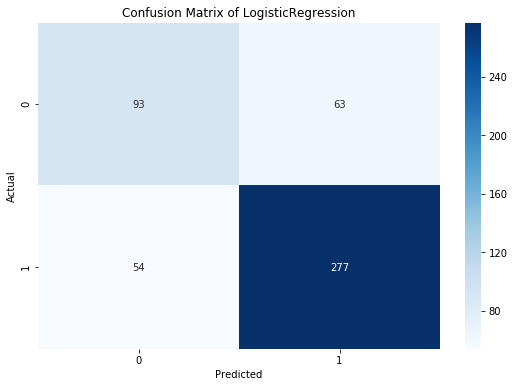

RidgeClassifier
              precision    recall  f1-score   support

        Fail       0.65      0.58      0.61       156
  Cross Sell       0.81      0.85      0.83       331

    accuracy                           0.77       487
   macro avg       0.73      0.72      0.72       487
weighted avg       0.76      0.77      0.76       487



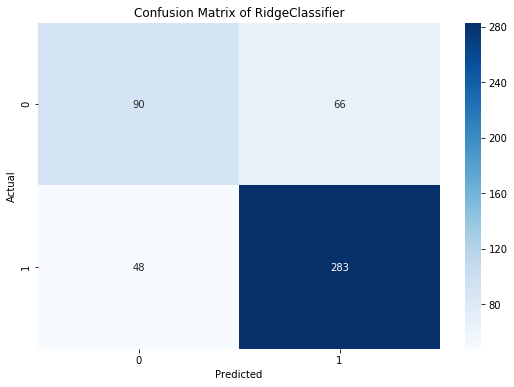

SGDClassifier
              precision    recall  f1-score   support

        Fail       0.67      0.51      0.58       156
  Cross Sell       0.79      0.88      0.84       331

    accuracy                           0.76       487
   macro avg       0.73      0.70      0.71       487
weighted avg       0.75      0.76      0.75       487



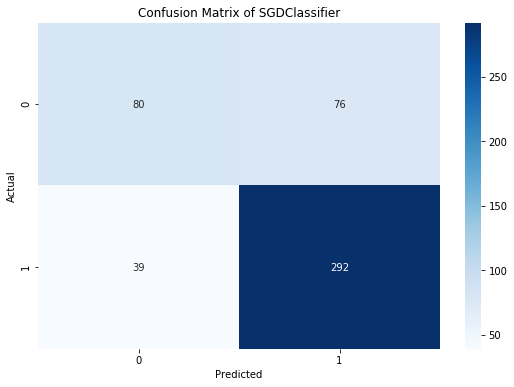

Perceptron
              precision    recall  f1-score   support

        Fail       0.45      0.27      0.34       156
  Cross Sell       0.71      0.85      0.77       331

    accuracy                           0.66       487
   macro avg       0.58      0.56      0.55       487
weighted avg       0.63      0.66      0.63       487



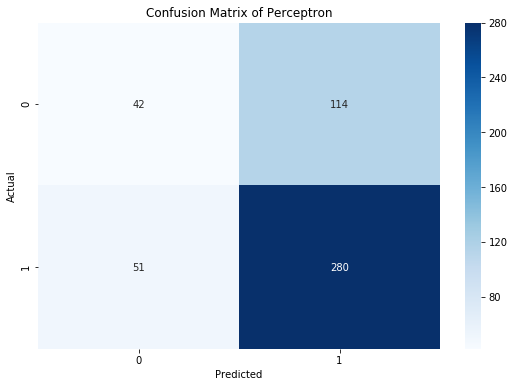

PassiveAggressiveClassifier
              precision    recall  f1-score   support

        Fail       0.66      0.55      0.60       156
  Cross Sell       0.80      0.86      0.83       331

    accuracy                           0.76       487
   macro avg       0.73      0.71      0.72       487
weighted avg       0.76      0.76      0.76       487



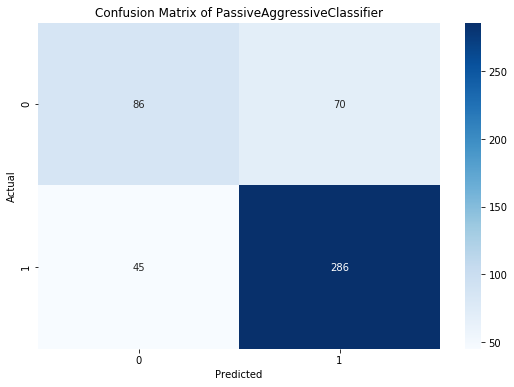

Linear Discriminant Analysis
              precision    recall  f1-score   support

        Fail       0.63      0.60      0.61       156
  Cross Sell       0.81      0.83      0.82       331

    accuracy                           0.76       487
   macro avg       0.72      0.71      0.72       487
weighted avg       0.75      0.76      0.76       487



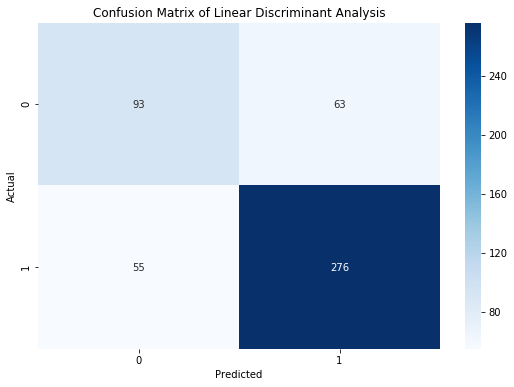

KNeighbors Classifier
              precision    recall  f1-score   support

        Fail       0.67      0.62      0.64       156
  Cross Sell       0.83      0.85      0.84       331

    accuracy                           0.78       487
   macro avg       0.75      0.74      0.74       487
weighted avg       0.77      0.78      0.78       487



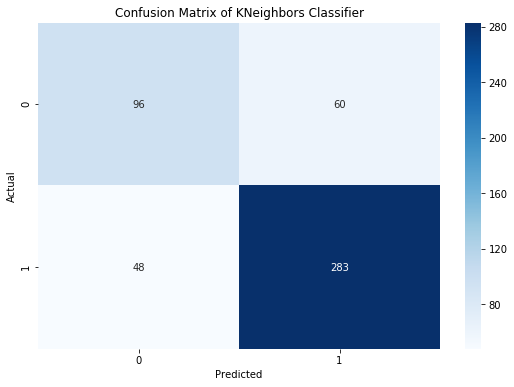

CART
              precision    recall  f1-score   support

        Fail       0.66      0.67      0.67       156
  Cross Sell       0.84      0.84      0.84       331

    accuracy                           0.79       487
   macro avg       0.75      0.76      0.76       487
weighted avg       0.79      0.79      0.79       487



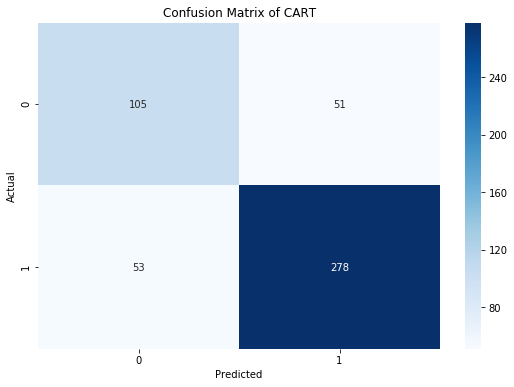

GaussianNB
              precision    recall  f1-score   support

        Fail       0.69      0.69      0.69       156
  Cross Sell       0.85      0.86      0.86       331

    accuracy                           0.80       487
   macro avg       0.77      0.77      0.77       487
weighted avg       0.80      0.80      0.80       487



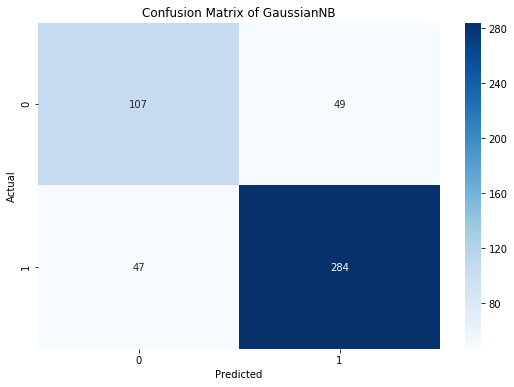

SVM
              precision    recall  f1-score   support

        Fail       0.70      0.59      0.64       156
  Cross Sell       0.82      0.88      0.85       331

    accuracy                           0.79       487
   macro avg       0.76      0.74      0.75       487
weighted avg       0.78      0.79      0.78       487



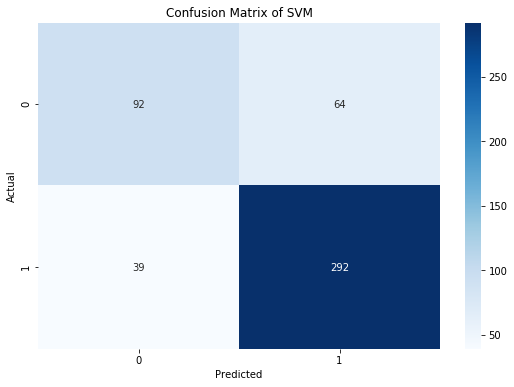

Gradient Boosting Classifier
              precision    recall  f1-score   support

        Fail       0.70      0.62      0.66       156
  Cross Sell       0.83      0.88      0.85       331

    accuracy                           0.79       487
   macro avg       0.76      0.75      0.75       487
weighted avg       0.79      0.79      0.79       487



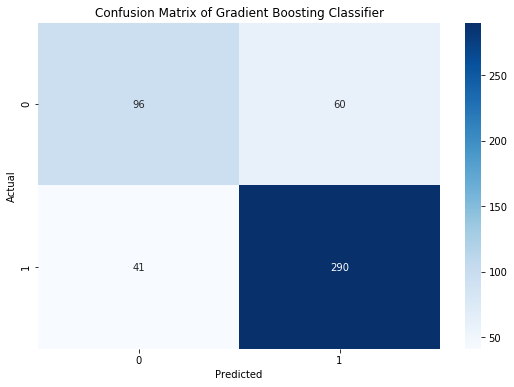

Ada Boost Classifier
              precision    recall  f1-score   support

        Fail       0.69      0.63      0.66       156
  Cross Sell       0.83      0.87      0.85       331

    accuracy                           0.79       487
   macro avg       0.76      0.75      0.76       487
weighted avg       0.79      0.79      0.79       487



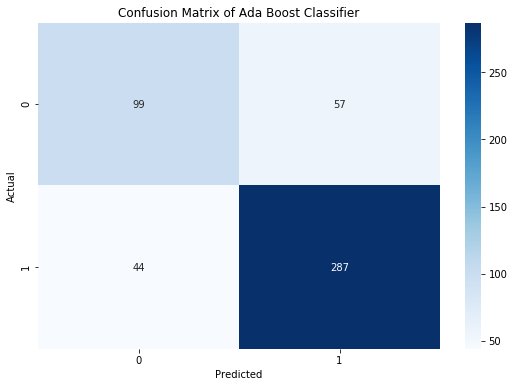

Bagging Classifier
              precision    recall  f1-score   support

        Fail       0.67      0.65      0.66       156
  Cross Sell       0.84      0.85      0.84       331

    accuracy                           0.79       487
   macro avg       0.76      0.75      0.75       487
weighted avg       0.78      0.79      0.79       487



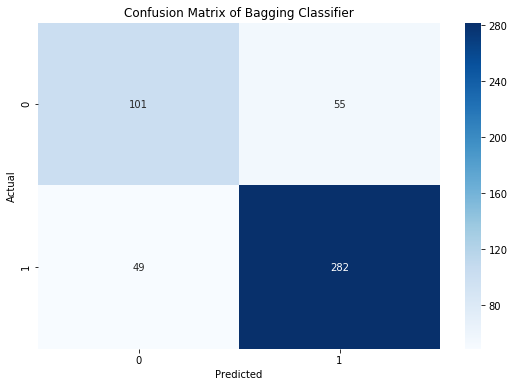

Random Forest Classifier
              precision    recall  f1-score   support

        Fail       0.70      0.60      0.65       156
  Cross Sell       0.82      0.88      0.85       331

    accuracy                           0.79       487
   macro avg       0.76      0.74      0.75       487
weighted avg       0.78      0.79      0.78       487



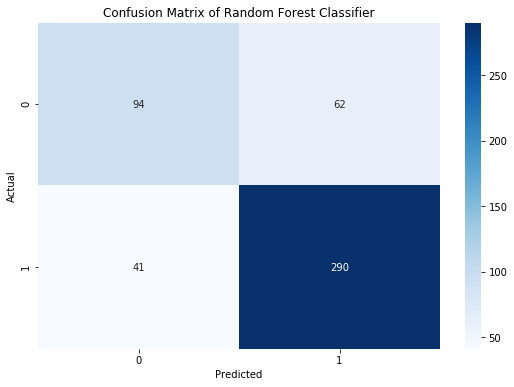

In [102]:
#Confusion Matrix and Classification Report of All Models

'''model_name=[]


for i,k in model_list.items():
    try:
        model = k
        mod_fit = model.fit(X_train_scaled, y_train_scaled)
        y_pred = model.predict(X_test_scaled)
        
        model_name.append(i)
        
        target_names = ['Fail','Cross Sell']
        print(f'{i}')
        print(classification_report(y_test_scaled,y_pred,target_names=target_names))
        # heatmap
        f, ax = plt.subplots(figsize=(9, 6))
        sns.heatmap(confusion_matrix(y_true = y_test_scaled,
                       y_pred = y_pred),
                    annot       = True,
                    cmap        = 'Blues',
                    fmt         = 'g')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix of {i}')
        plt.show()

    except: 
        pass'''

    


In [103]:
## Confusion Matrix Function
def visual_cm(true_y, pred_y, labels = None):
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<h1>Final Score & Model </h1>


**Scores and the Confusion Matrix of the GaussianNB Model**

   Model Name  Train Score  Test Score  AUC Score
0  GaussianNB          0.8         0.8      0.772


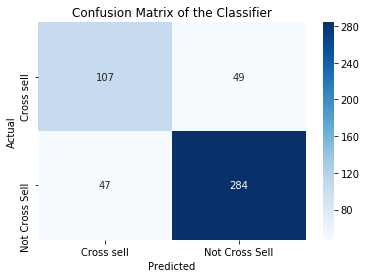

In [107]:
## Scores and the Confusion Matrix of the GaussianNB Model
model_name=[]
train_score=[]
test_score=[]
roc_auc=[]

model = GaussianNB()
mod_fit = model.fit(X_train_scaled, y_train_scaled)
y_pred = model.predict(X_test_scaled)
        
model_name.append('GaussianNB')
train_score.append(model.score(X_train_scaled, y_train_scaled).round(2))
test_score.append(model.score(X_test_scaled, y_test_scaled).round(2))
roc_auc.append(roc_auc_score(y_true = y_test_scaled,
                                     y_score = y_pred).round(4))


model_result = pd.DataFrame(list(zip(model_name,train_score,test_score,roc_auc)),
                           columns=['Model Name','Train Score', 'Test Score','AUC Score'])
print(model_result)


visual_cm(true_y = y_test_scaled,
          pred_y = y_pred,
          labels = ['Cross sell', 'Not Cross Sell'])

**Final Result**


According to our final model, which is GaussianNB, on the top right corner shows the actual success of cross sell but we predicted 49 of the customer as not cross sell which means we're wrong. Therefore, we might decrease the profit (not revenue) by giving promotion, discounts or similar approach to attract customer from not cross sell area, although they are already buying cross sell product. On the bottom left corner points out that we predict 47 of the customer purchases cross sell product. In fact, they do not. It can prevent us to take action to gain more customer for promoting cross sell. As a result of this model, the company should decrease the number on the top-right and the bottom-left corner while increasing the top-left corner.